<a href="https://colab.research.google.com/github/harikrishna0007/606-Capstone-Project/blob/main/Exploratory%20Data%20Analysis/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS

### Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

### Displaying the dataset

In [ ]:
df=pd.read_csv('eda_dataset.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(10)

,VIN,brand,model,trim,manufacture_year,mileage,transmission,drive_type,fuel_type,exterior_color,interior_color,accidents,owners,car_usage_type,price,car_age,state,MPG
0,5FPYK3F6XHB002417,Honda,Ridgeline,RTL-T AWD,2017,101576,Automatic,AWD,Gas,Silver,Gray,0,3,Personaluse,25499,5,IN,21.5
1,JTDKN3DP4C3008964,Toyota,Prius,Plug-in Hybrid Advanced,2012,65082,Automatic,FWD,Hybrid,Gray,Gray,0,1,Personaluse,20990,10,CA,50.0
2,SADCJ2FX7JA258056,Jaguar,F-PACE,Premium 25t,2018,29717,Automatic,AWD,Gas,White,Black,0,1,Personaluse,38625,4,NC,24.5
3,3FA6P0HR3DR138619,Ford,Fusion,SE FWD,2013,154044,Automatic,FWD,Gas,White,Black,0,2,Personaluse,7399,9,CA,28.0
4,JTJHT00WX64011715,Lexus,LX,LX 470,2006,224550,Automatic,4WD,Gas,Black,Red,1,1,Personaluse,14500,16,ID,15.0
5,5N1AT2MT1KC770345,Nissan,Rogue,S FWD,2019,151343,Automatic,FWD,Gas,Gray,Black,1,1,Personaluse,13881,3,ID,29.5
6,WDDHF8JB5EA812014,Mercedes-Benz,E-Class,E 350 4MATIC Luxury Sedan,2014,104220,Automatic,AWD,Gas,White,Black,1,3,Personaluse,17995,8,TX,25.0
7,1FTMF1CM9DKD84939,Ford,F-150,STX Reg Cab 6.5' Box 2WD,2013,165239,Automatic,RWD,Gas,White,Black,2,3,Fleetuse,9995,9,GA,20.0
8,2C4RDGCG3KR544465,Dodge,Grand Caravan,SXT,2019,18467,Automatic,FWD,Gas,White,Black,1,4,Fleetuse,26000,3,TX,21.0
9,KNMAT2MV7KP553686,Nissan,Rogue,SV AWD,2019,65126,Automatic,AWD,Gas,Black,Black,0,1,Fleetuse,22997,3,TX,28.5


### Checking the shape of the daatset

In [ ]:
df.shape

(9898, 18)

In [ ]:
df.columns

Index(['VIN', 'brand', 'model', 'trim', 'manufacture_year', 'mileage',
       'transmission', 'drive_type', 'fuel_type', 'exterior_color',
       'interior_color', 'accidents', 'owners', 'car_usage_type', 'price',
       'car_age', 'state', 'MPG'],
      dtype='object')

##### Extracted data consists of 9898 used car listings with 19 columns.

1. VIN : Vehicle Identification number which is unique    
2. brand: the company the car belongs to(automaker)
3. model: model of the vehicle
4. trim: more details of the vehicle model
5. manufacture_year : Year the vehicle was manufactured
6. mileage: mileage of the car
7. MPG: Avergae vehicle efficiency running in city and highway conditions, miles per gallon
8. transmission: automatic or manual transmission type
9. drive_type: drive type of the car
10. fuel_type: fuel type of the car, gasolin/diesel/hybrid/electric etc.
11. exterior_color: color of the car
12. interior_color: inside color of the car
13. accidents: contains data regarding accidents that happened to the car
14. owners: data about the number of previous owners
15. car_usage_type : contains details weather it was a personal vehicle or fleet vehicle used for rental purposes
16. Price : Price at which the car is being sold
17. car_age : Age of the car
18. state: current state where the car is located

### Checking if the dataset has any null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   VIN               9898 non-null   object 
 1   brand             9898 non-null   object 
 2   model             9898 non-null   object 
 3   trim              9898 non-null   object 
 4   manufacture_year  9898 non-null   int64  
 5   mileage           9898 non-null   int64  
 6   transmission      9898 non-null   object 
 7   drive_type        9898 non-null   object 
 8   fuel_type         9898 non-null   object 
 9   exterior_color    9898 non-null   object 
 10  interior_color    9898 non-null   object 
 11  accidents         9898 non-null   int64  
 12  owners            9898 non-null   int64  
 13  car_usage_type    9898 non-null   object 
 14  price             9898 non-null   int64  
 15  car_age           9898 non-null   int64  
 16  state             9898 non-null   object 


In [ ]:
df.isna().sum()

VIN                 0
brand               0
model               0
trim                0
manufacture_year    0
mileage             0
transmission        0
drive_type          0
fuel_type           0
exterior_color      0
interior_color      0
accidents           0
owners              0
car_usage_type      0
price               0
car_age             0
state               0
MPG                 0
dtype: int64

##### We see there are no null values found in any of the columns

### More details about the dataset

#### Descriptive statistics for Numerical columns

In [ ]:
df.describe()

,manufacture_year,mileage,accidents,owners,price,car_age,MPG
count,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000
mean,2017.765811,51977.215296,0.137705,1.586381,30728.434835,4.234189,25.714437
std,2.753435,33827.745224,0.397439,0.793059,14645.494270,2.753435,10.004822
min,1997.000000,5.000000,0.000000,1.000000,2995.000000,0.000000,12.000000
25%,2016.000000,26960.500000,0.000000,1.000000,20991.000000,2.000000,21.000000
50%,2018.000000,46740.000000,0.000000,1.000000,27998.000000,4.000000,24.500000
75%,2020.000000,70449.000000,0.000000,2.000000,37000.000000,6.000000,28.500000
max,2022.000000,266229.000000,4.000000,10.000000,272990.000000,25.000000,141.500000


##### We have vehicle models from 1997 - 2022, Mileage ranging from 5 miles to 266229 miles, Price between 2995 and 272990 dollars.


#### Descriptive statistics for Categorical columns

In [ ]:
df.describe(exclude = np.number).T 

,count,unique,top,freq
VIN,9898,9898,5FPYK3F6XHB002417,1
brand,9898,41,Ford,1156
model,9898,432,F-150,271
trim,9898,2268,Limited 4WD,170
transmission,9898,2,Automatic,9597
drive_type,9898,4,FWD,3496
fuel_type,9898,4,Gas,9501
exterior_color,9898,16,White,2750
interior_color,9898,9,Black,6833
car_usage_type,9898,2,Personaluse,8292


### Looking at the coverage of data and the number of vehicles from each state

In [ ]:
def perc_on_bar(plot, feature):
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 10)  
    plt.show()

In [ ]:
df['state'].value_counts(sort=True)

 TX    2162
 FL    1532
 CA    1187
 NC     430
 GA     371
 VA     324
 NJ     277
 NY     275
 IL     251
 OH     237
 PA     235
 AZ     229
 TN     215
 IN     195
 WA     157
 MO     151
 MD     126
 CO     123
 MI     116
 AL     104
 NV      99
 SC      96
 KY      87
 OR      85
 ID      79
 MA      78
 OK      67
 AR      58
 WI      57
 CT      50
 LA      48
 NM      48
 MN      46
 IA      46
 KS      44
 UT      40
 NH      28
 NE      27
 ND      24
 HI      21
 MT      20
 MS      11
 WY       8
 AK       8
 WV       7
 DE       6
 RI       6
 SD       4
 ME       3
Name: state, dtype: int64

### Visualizing the number of car listings per state

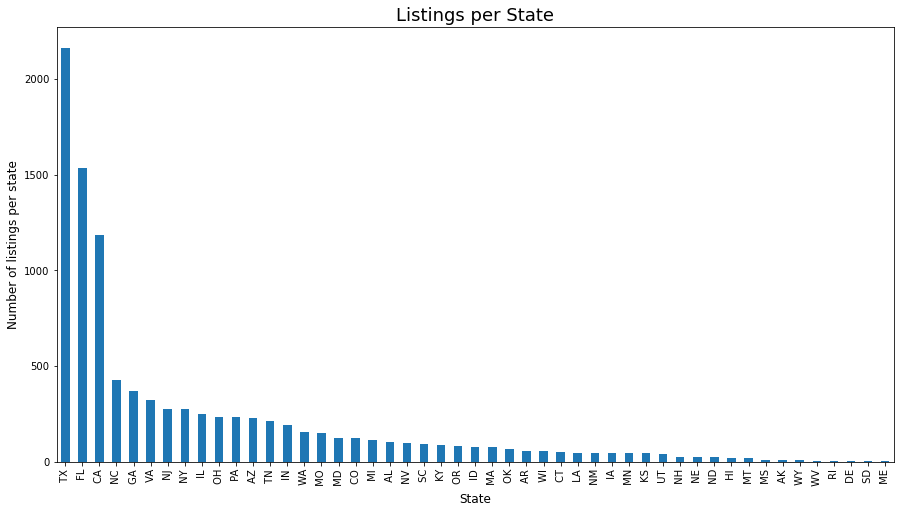

In [ ]:
df.groupby(['state'])['manufacture_year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per state', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.title('Listings per State', fontsize=18)
plt.show()

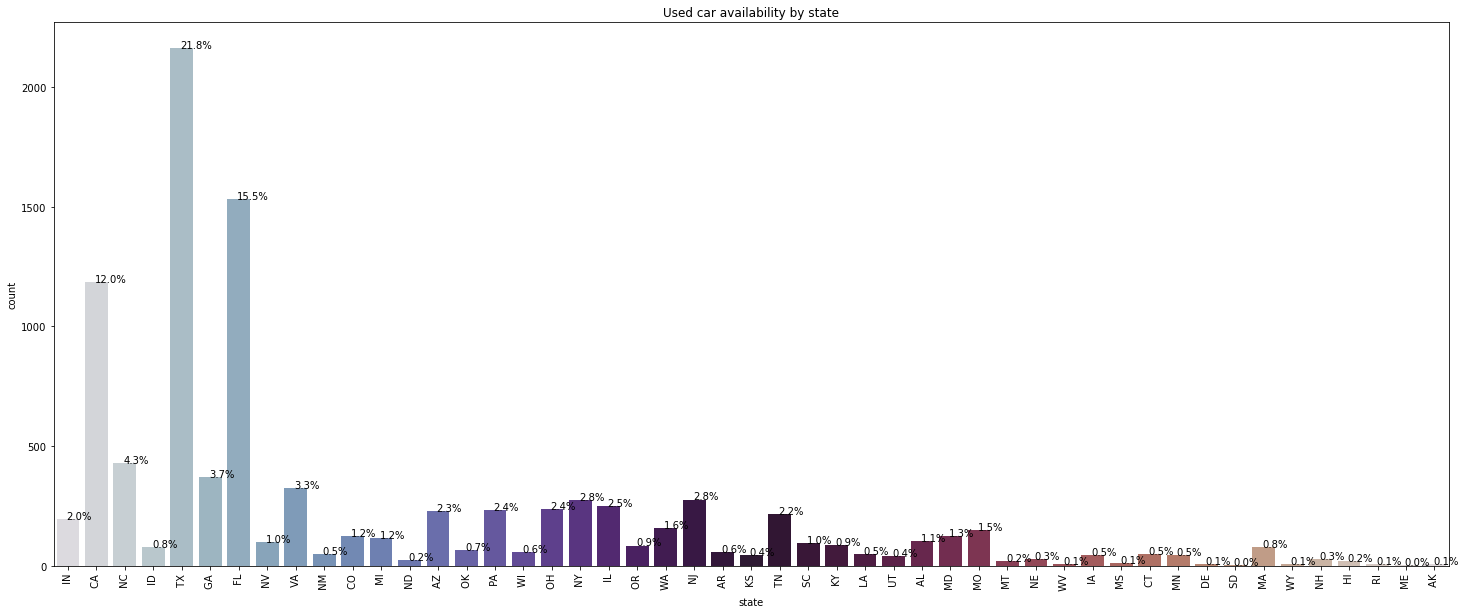

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.countplot(df['state'],palette='twilight')
plt.xticks(rotation=90)
plt.title('Used car availability by state');
perc_on_bar(ax,df['state'])

#### Findings:
1. From this we can clearly see that texas stands in the first position in the number of listings with 2162 and next is florida with around 1532 car listings and california has 1187. The least number of cars being posted online from the state of Maine which is just 3.
2. We can clearly see that these three states have highest resale listings because we know that these states are highly populated when compared to other states. So it used cars have correlation with population.


### Vehicle listings per automaker

In [ ]:
df['brand'].value_counts(sort=True)

Ford             1156
Toyota           1005
Chevrolet         952
Jeep              732
Nissan            723
Honda             562
Mercedes-Benz     508
BMW               449
Hyundai           395
Lexus             350
Dodge             336
Kia               329
Ram               288
Volkswagen        245
GMC               226
Subaru            205
Audi              201
Mazda             154
INFINITI          129
Chrysler          112
Land Rover        106
Cadillac          100
Lincoln            89
Acura              88
Buick              86
Volvo              82
Porsche            72
Tesla              65
Jaguar             38
MINI               35
Mitsubishi         29
Genesis            16
Scion               8
Alfa                8
Maserati            6
HUMMER              4
Bentley             2
smart               2
Mercury             2
FIAT                2
Aston               1
Name: brand, dtype: int64

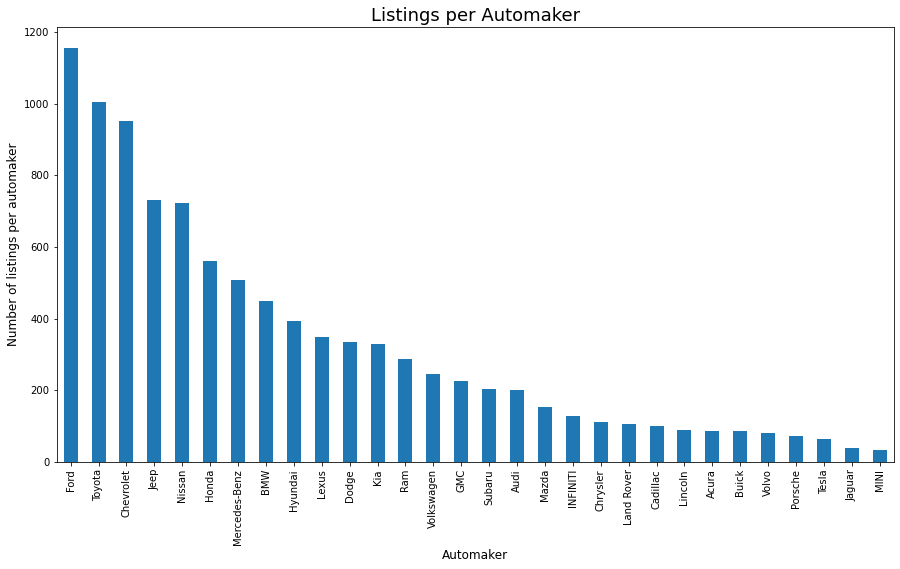

In [ ]:
## Only listing the top 30 car makers for better visualization and aslo the rest does not have significant number of resale cars
df.groupby(['brand'])['manufacture_year'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of listings per automaker', fontsize=12)
plt.xlabel('Automaker', fontsize=12)
plt.title('Listings per Automaker', fontsize=18)
plt.show()

In [ ]:
len(df[(df.brand=='Ford') | (df.brand=='Chevrolet')|(df.brand=='Toyota')|(df.brand=='Jeep')|(df.brand=='Nissan')])/len(df)

0.46150737522731866

#### Findings:

Ford is the domimant brand on the used car market. And Chevrolet, Toyota, Jeep, Nissan are another top 4 makers. Totally they account for about 46% of the used car listings.

Ford and Chevrolet are two US brands that lots of consumers like to purchase (maybe because of US brand, brand loyalty, etc). Toyota and Nissan are two Japanese brands which represent for cost-benefit efficient cars and their used cars works very well after long-time use.

### Listing of cars by year and checking the distribution

In [ ]:
df.manufacture_year.value_counts(sort=True)

2019    2398
2018    1510
2020    1473
2017     956
2021     811
2016     791
2015     620
2014     383
2013     297
2022     225
2012     159
2011      90
2010      49
2008      35
2007      25
2009      21
2004      13
2006      13
2003       9
2005       9
2000       3
2002       3
1997       2
1998       1
2001       1
1999       1
Name: manufacture_year, dtype: int64

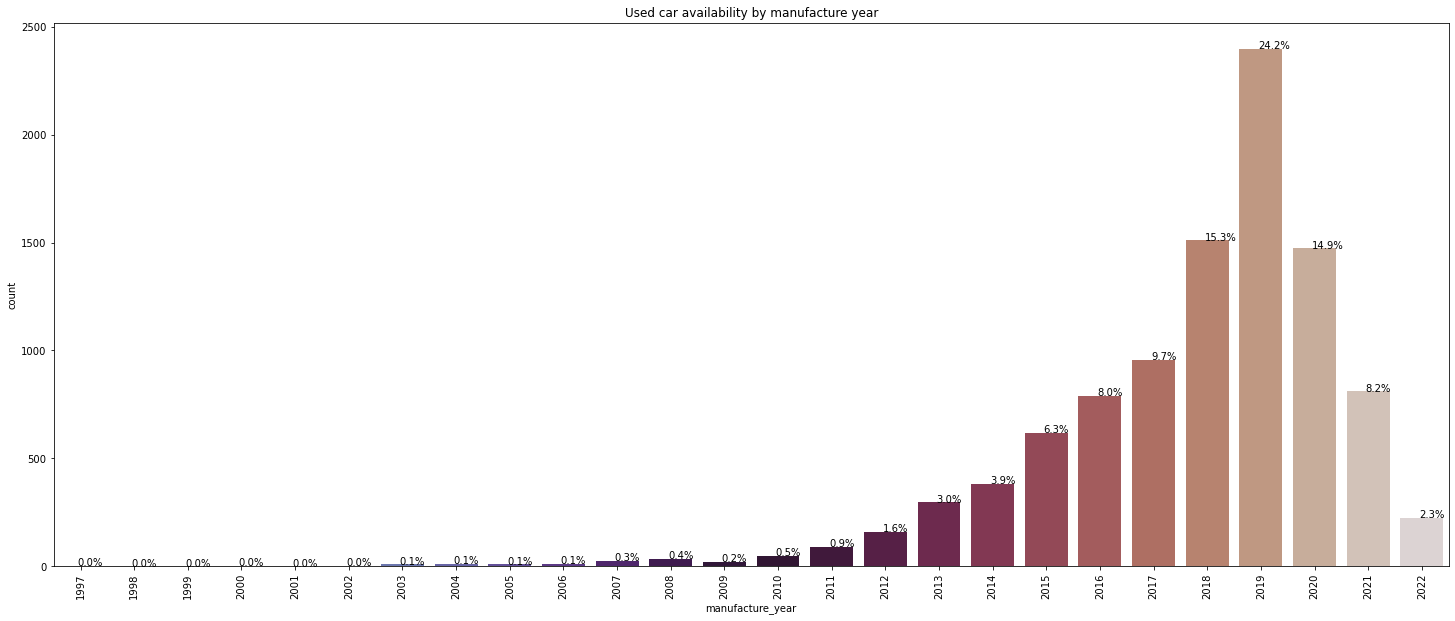

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.countplot(df['manufacture_year'],palette='twilight')
plt.xticks(rotation=90)
plt.title('Used car availability by manufacture year');
perc_on_bar(ax,df['manufacture_year'])

##### Most of the cars posted are realatively new

### Checking if the cars sold on private website are mostly accidental?

In [ ]:
df['accidents'].value_counts(sort=True)

0    8705
1    1043
2     134
3      12
4       4
Name: accidents, dtype: int64

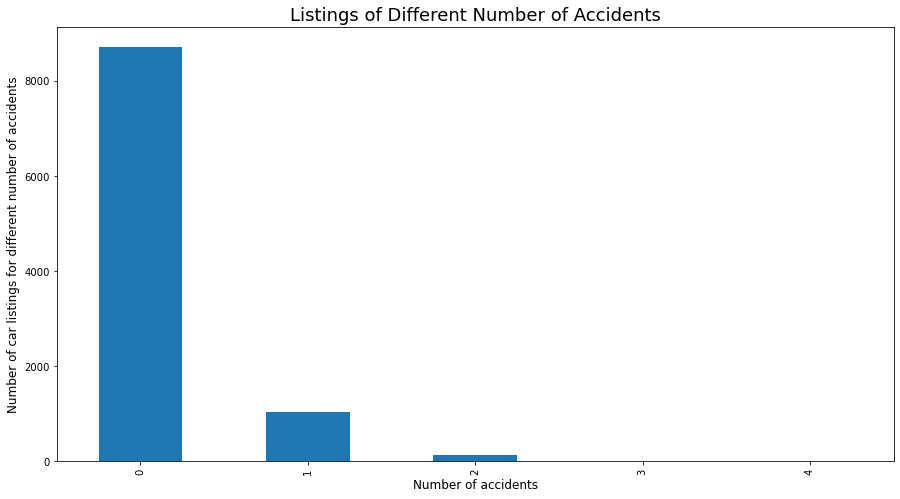

In [ ]:
df.groupby(['accidents'])['manufacture_year'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Number of car listings for different number of accidents', fontsize=12)
plt.xlabel('Number of accidents', fontsize=12)
plt.title('Listings of Different Number of Accidents', fontsize=18)
plt.show()

##### Our hypothesis here is wrong that used car website publishes cars with accident history as most of the cars are with no accidents

### Used car availability by Fuel Type

In [ ]:
df.fuel_type.value_counts(sort=True)

Gas         9501
Diesel       175
Hybrid       143
Electric      79
Name: fuel_type, dtype: int64

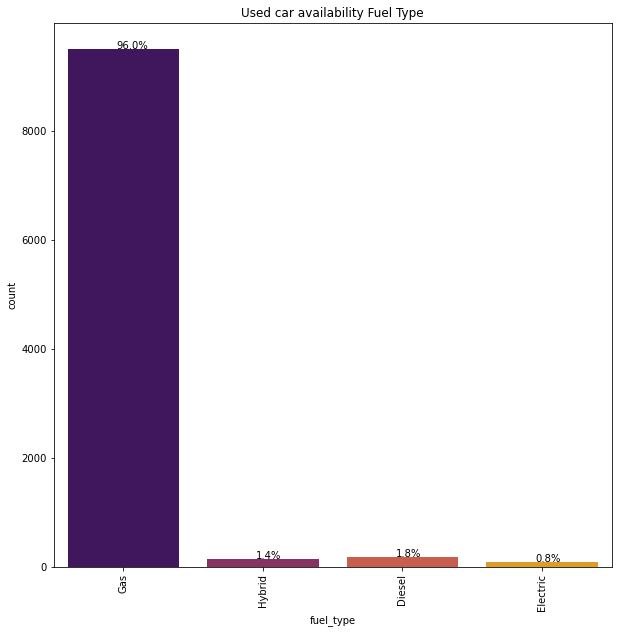

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(df['fuel_type'],palette='inferno')
plt.xticks(rotation=90)
plt.title('Used car availability Fuel Type')
perc_on_bar(ax,df['fuel_type'])

##### Almost 96% of the car listings are with fuel type as Gas and only few cars are Hybrid, Diesel and Electri

### Used car availability by Transmission Type

In [ ]:
df.transmission.value_counts(sort=True)

 Automatic    9597
 Manual        301
Name: transmission, dtype: int64

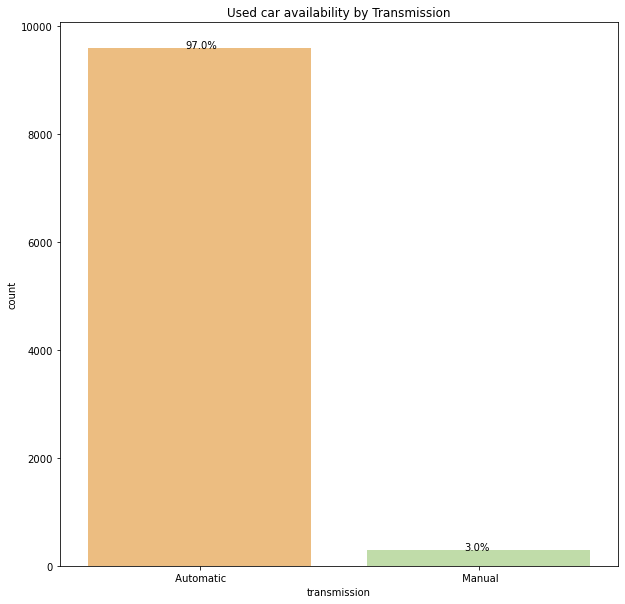

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(df['transmission'],palette='Spectral')
plt.title('Used car availability by Transmission');
perc_on_bar(ax,df['transmission'])

##### Most of the cars have automatic transmission

### Checking for mean price of car based on various attributes available to us

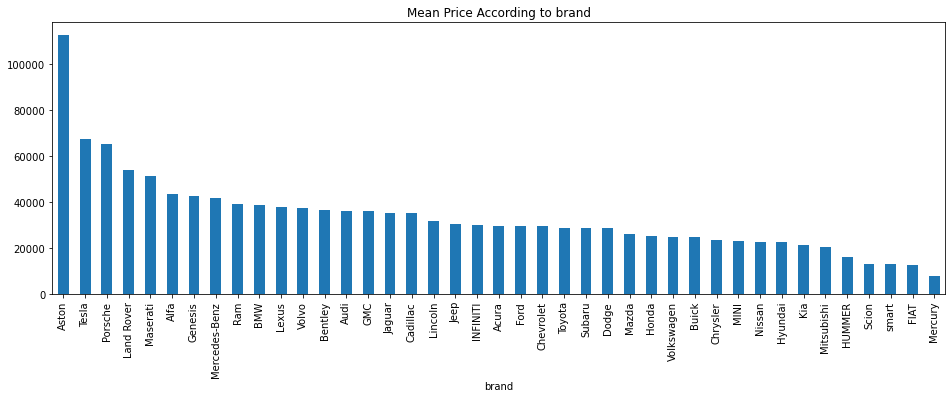

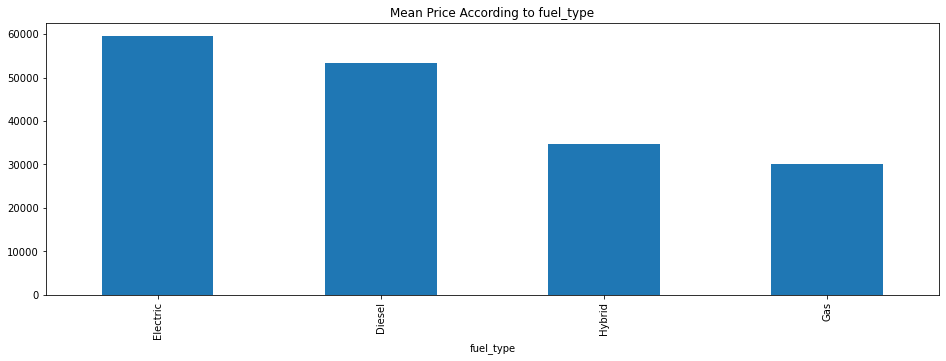

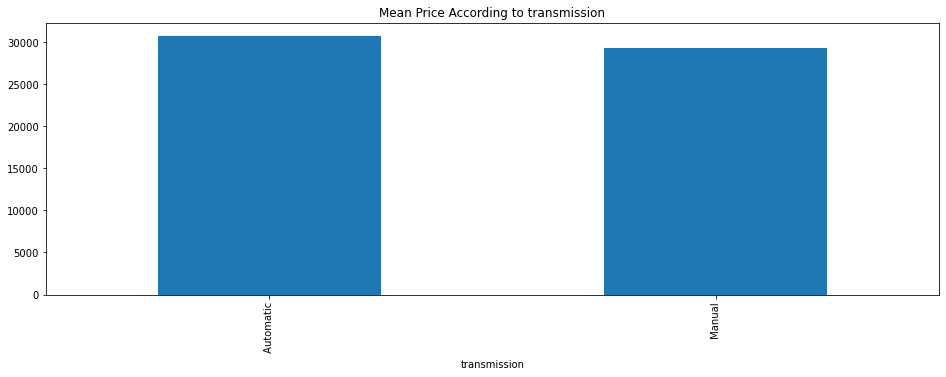

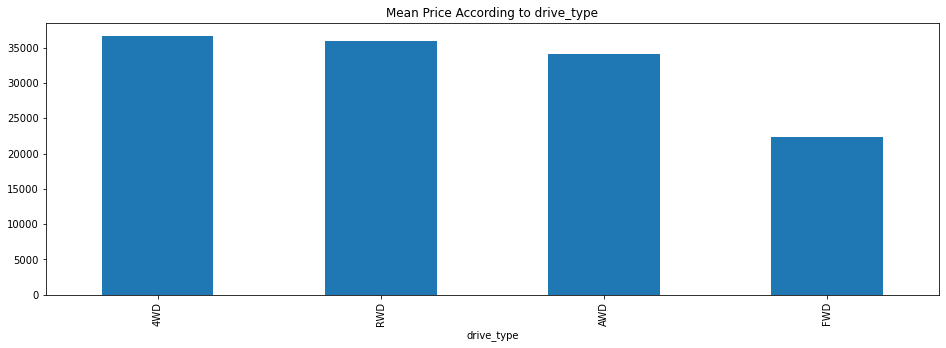

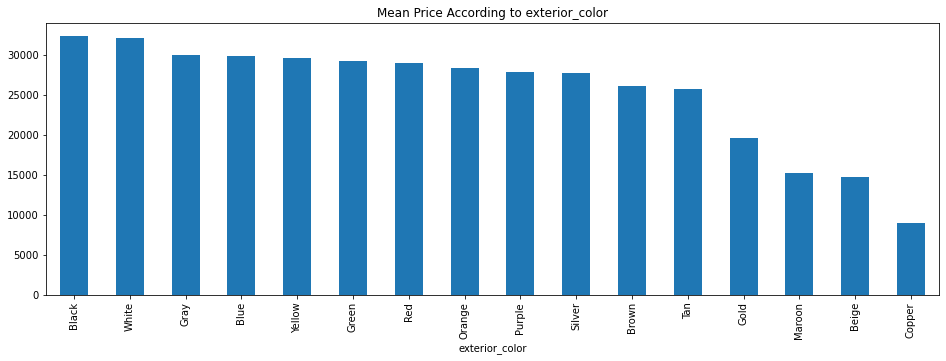

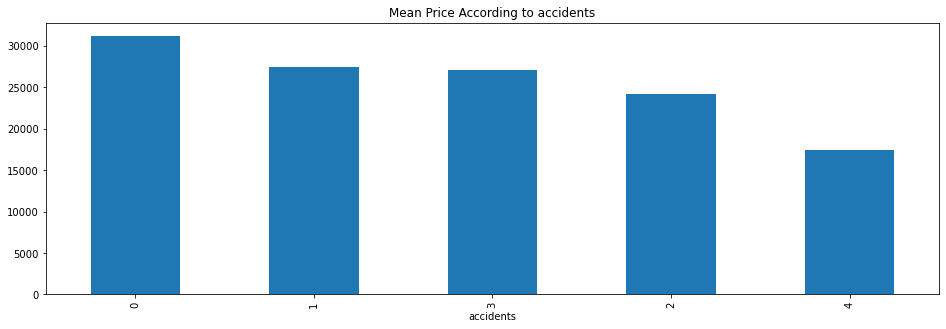

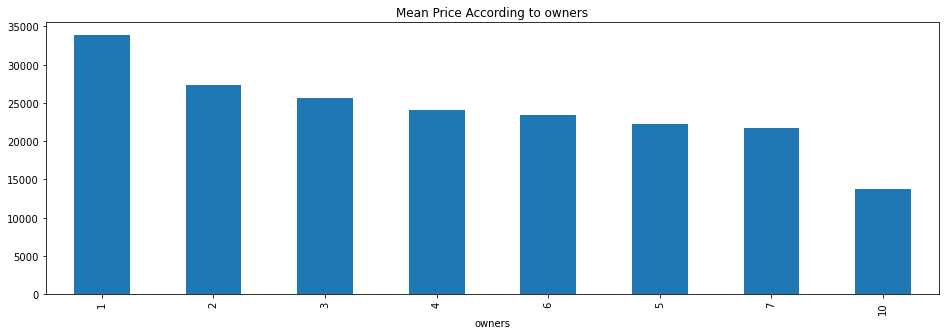

In [ ]:
cols=["brand","fuel_type","transmission","drive_type","exterior_color", 'accidents',"owners"]
for i in cols:
    df.groupby(i)["price"].mean().sort_values(ascending=False).plot.bar(figsize=(16,5));
    plt.title("Mean Price According to " + str(i))
    plt.show();

### Checking for price distribution, since it is going to be our target variable

In [ ]:
df['price'].describe()

count      9898.000000
mean      30728.434835
std       14645.494270
min        2995.000000
25%       20991.000000
50%       27998.000000
75%       37000.000000
max      272990.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Car Price Distribution Plot')

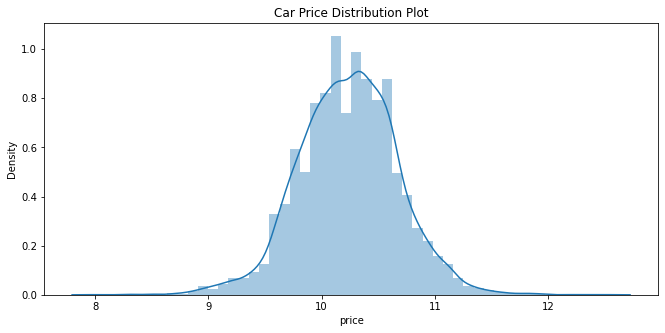

In [ ]:
# This makes it very easy to spot anomalies, such as outliers
plt.figure(figsize=[11,5])
sns.distplot(np.log1p(df['price']))
plt.title('Car Price Distribution Plot')

##### Looks right skewed. So we do normal distribution.

(array([4.000e+00, 2.500e+01, 2.170e+02, 1.349e+03, 3.479e+03, 3.601e+03,
        1.056e+03, 1.450e+02, 1.900e+01, 3.000e+00]),
 array([ 8.00503334,  8.45624942,  8.9074655 ,  9.35868157,  9.80989765,
        10.26111373, 10.7123298 , 11.16354588, 11.61476195, 12.06597803,
        12.51719411]),
 <BarContainer object of 10 artists>)

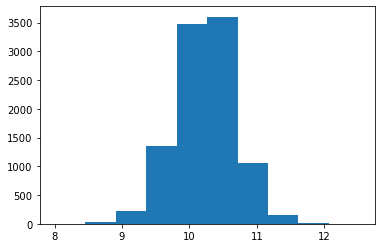

In [ ]:
plt.hist(np.log1p(df["price"]))

### Finding the corerelation among the columns

In [ ]:
df.corr()

,manufacture_year,mileage,accidents,owners,price,car_age,MPG
manufacture_year,1.000000,-0.653921,-0.126568,-0.478347,0.478640,-1.000000,0.099493
mileage,-0.653921,1.000000,0.139664,0.347409,-0.520272,0.653921,-0.099485
accidents,-0.126568,0.139664,1.000000,0.099300,-0.096035,0.126568,-0.013665
owners,-0.478347,0.347409,0.099300,1.000000,-0.226725,0.478347,-0.062438
price,0.478640,-0.520272,-0.096035,-0.226725,1.000000,-0.478640,-0.066046
car_age,-1.000000,0.653921,0.126568,0.478347,-0.478640,1.000000,-0.099493
MPG,0.099493,-0.099485,-0.013665,-0.062438,-0.066046,-0.099493,1.000000


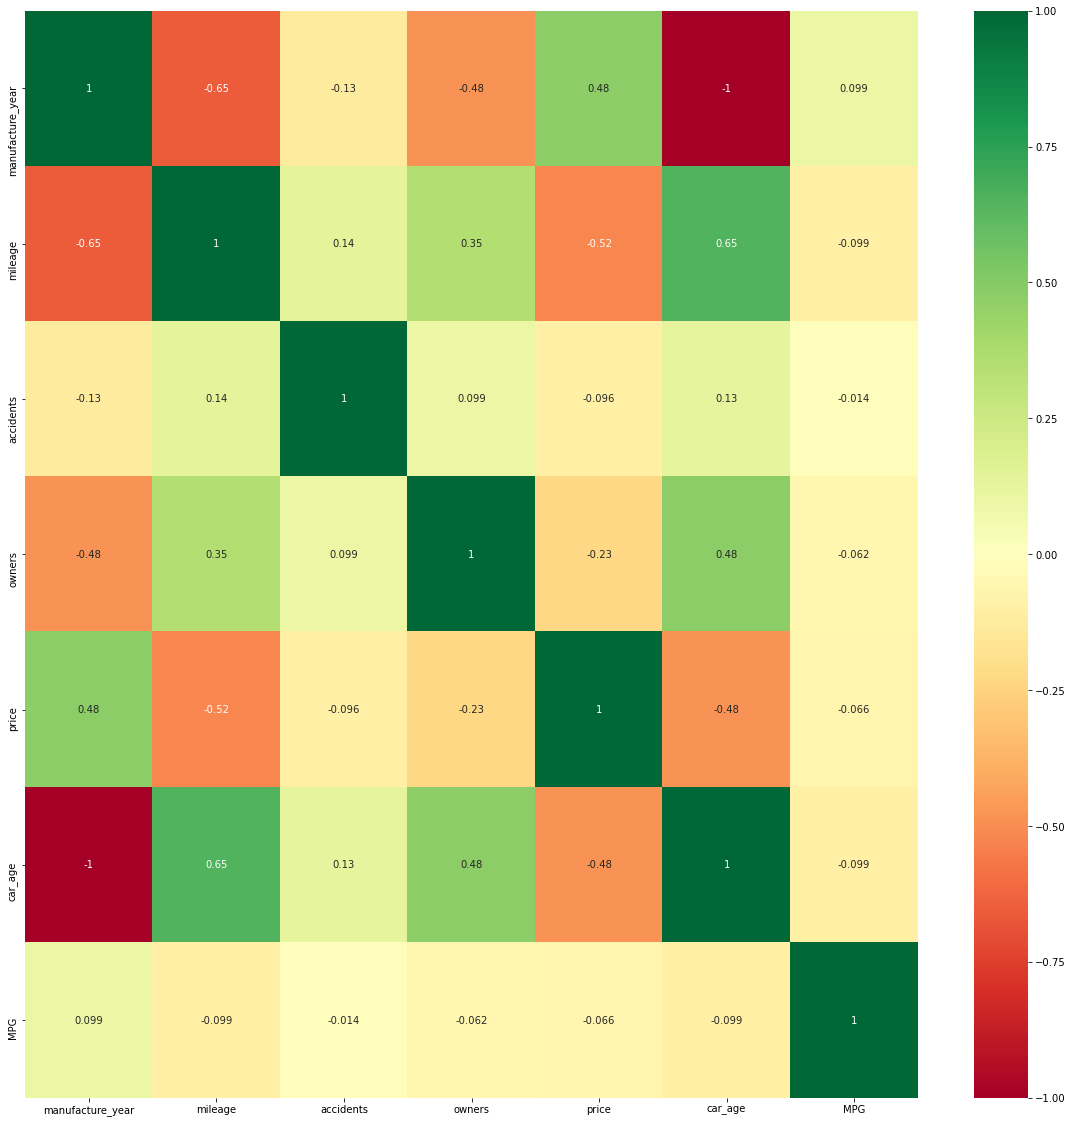

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Checking the linearity among the columns

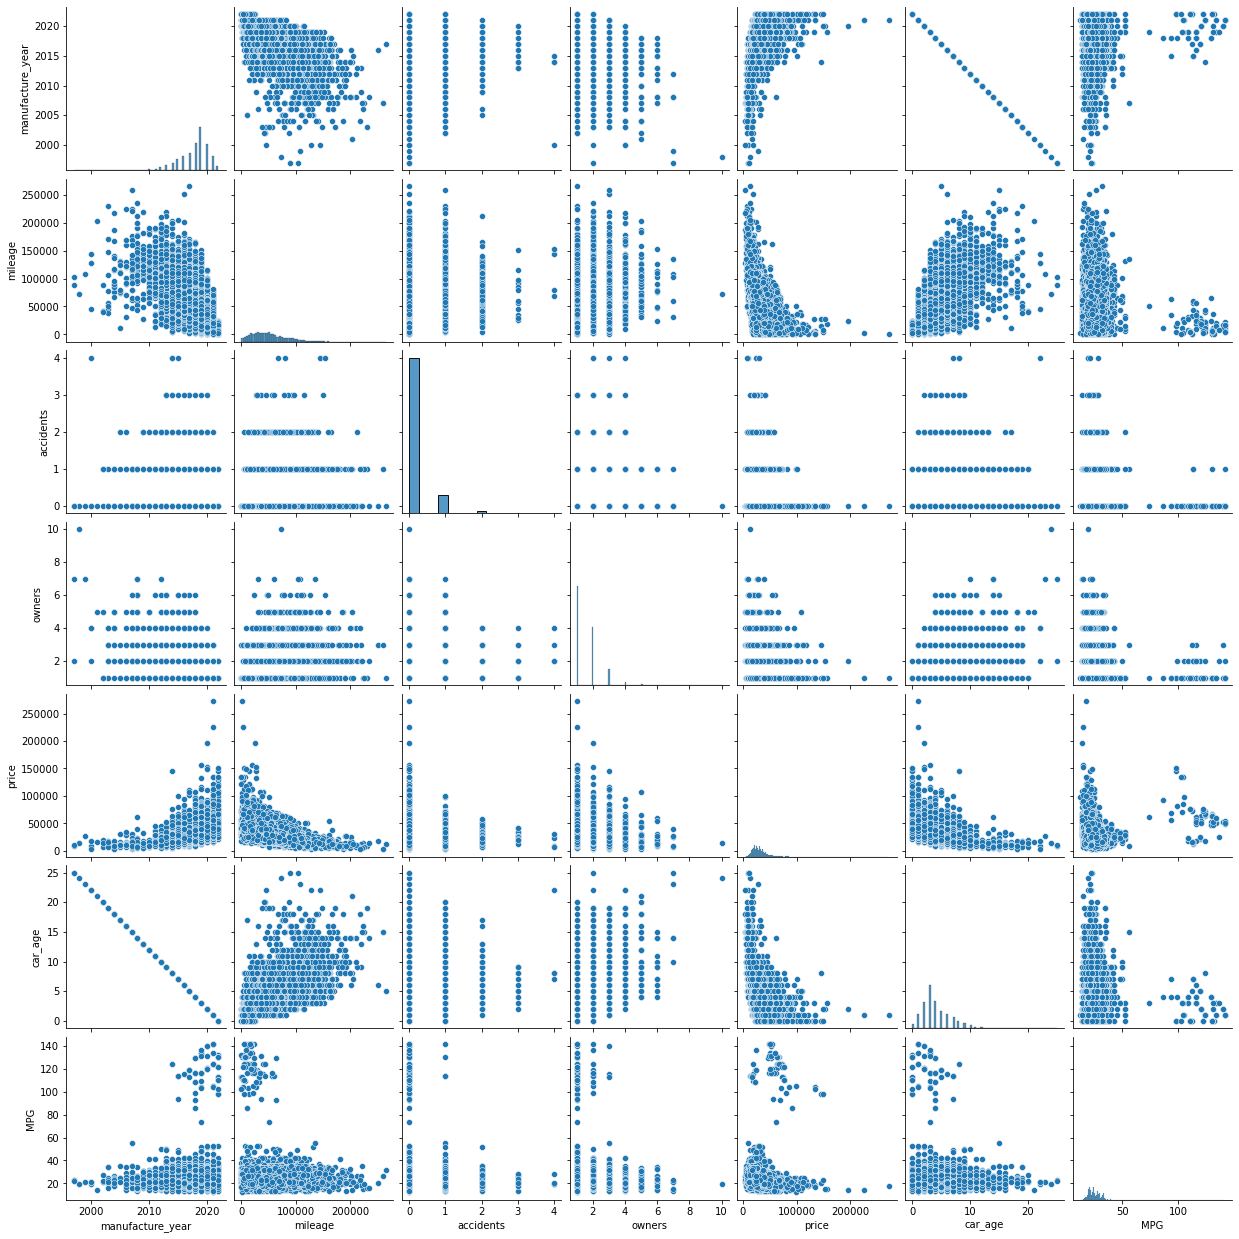

In [ ]:
sns.pairplot(df)

#### We see the linearity only between car_age and manufacture year, and also between MPG_city and MPG_highway